# Manejo de la Respuesta JSON de la API

Uso de [JSON Placeholder](https://jsonplaceholder.typicode.com/), una _API falsa_ o _dummy_ como herramienta de práctica.

In [17]:
import requests
from typing import Any

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url: str = 'https://jsonplaceholder.typicode.com/posts/1'

In [3]:
response: requests.Response = requests.get(url)

In [13]:
data: dict[str, int | str] = response.json()
data

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

In [5]:
data['title']

'sunt aut facere repellat provident occaecati excepturi optio reprehenderit'

In [12]:
url_all_posts: str = 'https://jsonplaceholder.typicode.com/posts'
response_all_posts: requests.Response = requests.get(url_all_posts)
data_all_posts: list[dict[str, int | str]] = response_all_posts.json()
data_all_posts

[{'userId': 1,
  'id': 1,
  'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
  'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'},
 {'userId': 1,
  'id': 2,
  'title': 'qui est esse',
  'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'},
 {'userId': 1,
  'id': 3,
  'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut',
  'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'},
 {'userId': 1,
  'id': 4,
  'title': 'eum et est occaecati',
  'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provid

Obtener los `userId` de cada post:

In [ ]:
users: list[int] = [post['userId'] for post in data_all_posts] # type: ignore
users

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

Convertir a `Serie` de Pandas:

In [16]:
user_id: pd.Series = pd.Series(users)
user_id

0      1
1      1
2      1
3      1
4      1
      ..
95    10
96    10
97    10
98    10
99    10
Length: 100, dtype: int64

Visualizar la data:

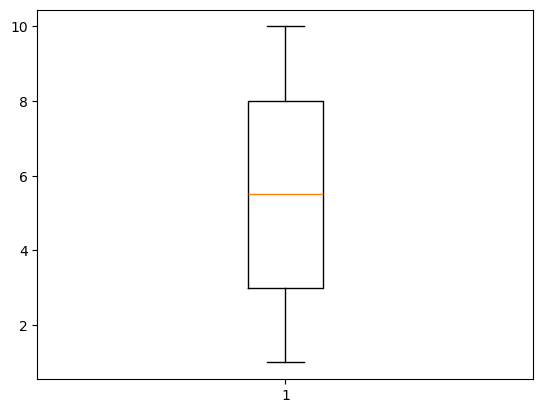

In [18]:
plt.boxplot(user_id)
plt.show()

## Pequeña exploración personal

Lo de arriba no me pareció muy completo, así que intentaré aquí algo un poco más interesante:

In [ ]:
post_count_by_user_id: dict[int, int] = {}
for post in data_all_posts:
    user_id: int = post['userId'] # type: ignore
    post_count_by_user_id[user_id] = post_count_by_user_id.get(user_id, 0) + 1
post_count_by_user_id

{1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10, 9: 10, 10: 10}

Cada usuario ha posteado 10 veces, por lo que no obtendremos una gráfica muy interesante del conteo de posts por usuario:

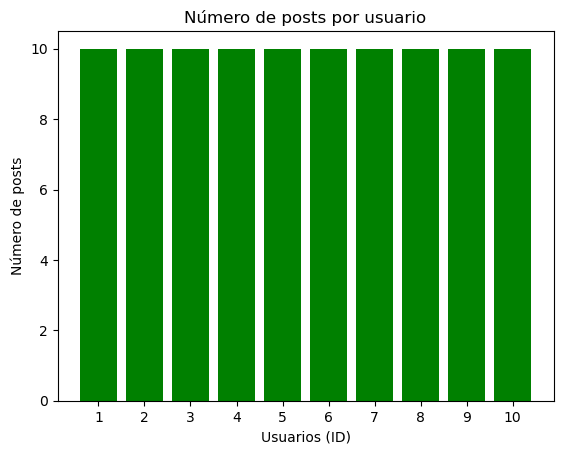

In [30]:
df: pd.DataFrame = pd.DataFrame.from_dict(
    post_count_by_user_id,
    columns=['Post Count'],
    orient='index'
)

_, ax = plt.subplots()

ax.bar(
    df.index,
    df['Post Count'],
    color='green',
)
ax.set_xticks(df.index)
ax.set_xlabel('Usuarios (ID)')
ax.set_ylabel('Número de posts')
ax.set_title('Número de posts por usuario')
plt.show()